In [216]:
from h5py import File
import os, glob
from Assembler import *
from matplotlib import pyplot as plt

In [154]:
run_dir = '/gpfs/exfel/exp/SPB/201831/p900039/proc/r0273/'
files = glob.glob(os.path.join(run_dir, '*.h5'))
files.sort()
h5=[File(fn, 'r') for fn in files]
data=Test()

In [5]:
h5

[<HDF5 file "CORR-R0273-AGIPD00-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD01-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD02-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD03-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD04-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD05-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD06-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD07-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD08-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD09-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD10-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD11-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD12-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD13-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD14-S00000.h5" (mode r)>,
 <HDF5 file "CORR-R0273-AGIPD15-S00000.h5" (mode r)>]

In [155]:
for n,k in enumerate(data.keys()):
    data[k]['image.data'] = h5[n]['/INSTRUMENT/SPB_DET_AGIPD1M-1/DET/{}CH0:xtdf/image'.format(n)]['data'][12345]


In [217]:
A=Assemble()

In [222]:
image=A.stack(data, modules_only=False)
#image[image>5000]=np.nan
#image[image<-1000]=np.nan

In [210]:
image[0]

array([  5.7010016, 120.673874 ,  27.082462 , ...,  15.919346 ,
        -5.995126 ,  15.17278  ], dtype=float32)

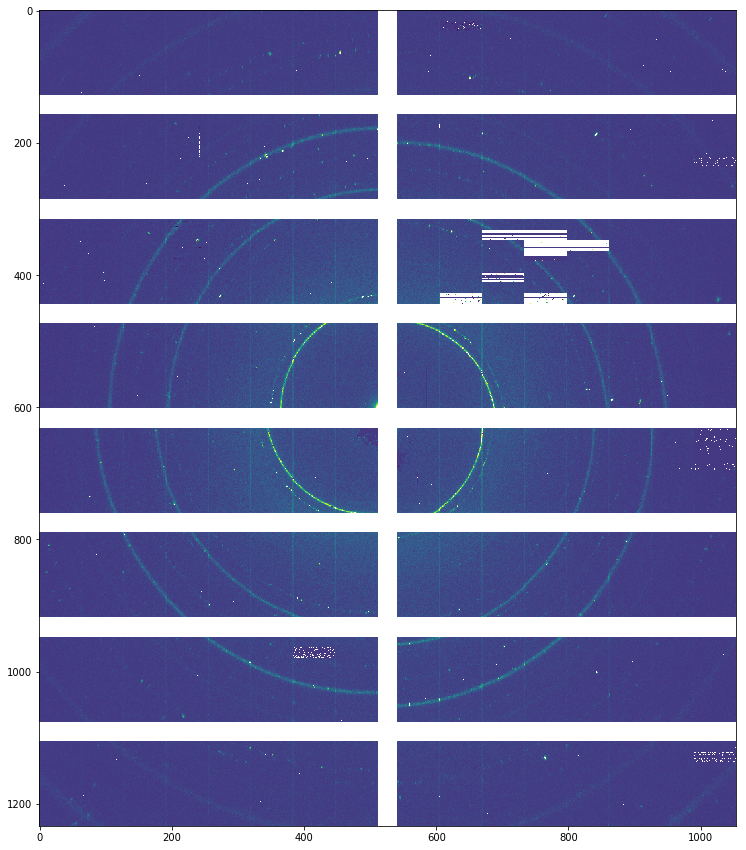

In [221]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.imshow(image)

In [223]:
np.savez('image.npz', image=image)

In [225]:
image.shape

(1234, 1054)